<a href="https://colab.research.google.com/github/AmirhosseinnnKhademi/GEN-AI---TF/blob/main/Course%204%20-%20Generative%20Deep%20Learning/W2/assignment/C4W2_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2 Assignment: CIFAR-10 Autoencoder

For this week, you will create a convolutional autoencoder for the [CIFAR10](https://www.tensorflow.org/datasets/catalog/cifar10) dataset. You are free to choose the architecture of your autoencoder provided that the output image has the same dimensions as the input image.

After training, your model should meet loss and accuracy requirements when evaluated with the test dataset. You will then download the model and upload it in the classroom for grading.

Let's begin!

***Important:*** *This colab notebook has read-only access so you won't be able to save your changes. If you want to save your work periodically, please click `File -> Save a Copy in Drive` to create a copy in your account, then work from there.*  

## Imports

In [23]:
import tensorflow as tf
import tensorflow_datasets as tfds

from keras.models import Sequential

## Load and prepare the dataset

The [CIFAR 10](https://www.tensorflow.org/datasets/catalog/cifar10) dataset already has train and test splits and you can use those in this exercise. Here are the general steps:

* Load the train/test split from TFDS. Set `as_supervised` to `True` so it will be convenient to use the preprocessing function we provided.
* Normalize the pixel values to the range [0,1], then return `image, image` pairs for training instead of `image, label`. This is because you will check if the output image is successfully regenerated after going through your autoencoder.
* Shuffle and batch the train set. Batch the test set (no need to shuffle).


In [24]:
# preprocessing function
def map_image(image, label):
  image = tf.cast(image, dtype=tf.float32) # Data conversion: This converts the image data to 32-bit floating point numbers. This is important because later operations (like division) require floating point precision.
  image = image / 255.0 # Normalization: Pixel values in images are usually in the range [0, 255]. Dividing by 255.0 scales them to the range [0, 1], which is common for neural network inputs.

  return image, image # dataset label is not used. replaced with the same image input.

# parameters
BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024


### START CODE HERE (Replace instances of `None` with your code) ###

# use tfds.load() to fetch the 'train' split of CIFAR-10
train_dataset = tfds.load('cifar10', split = 'train', as_supervised = True)

# preprocess the dataset with the `map_image()` function above
train_dataset = train_dataset.map(map_image)

# shuffle and batch the dataset
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

# use tfds.load() to fetch the 'test' split of CIFAR-10
test_dataset = tfds.load('cifar10', split = 'test', as_supervised=True)

# preprocess the dataset with the `map_image()` function above
test_dataset = test_dataset.map(map_image)

# batch the dataset
test_dataset = test_dataset.batch(BATCH_SIZE)

### END CODE HERE ###

## Build the Model

Create the autoencoder model. As shown in the lectures, you will want to downsample the image in the encoder layers then upsample it in the decoder path. Note that the output layer should be the same dimensions as the original image. Your input images will have the shape `(32, 32, 3)`. If you deviate from this, your model may not be recognized by the grader and may fail.

We included a few hints to use the Sequential API below but feel free to remove it and use the Functional API just like in the ungraded labs if you're more comfortable with it. Another reason to use the latter is if you want to visualize the encoder output. As shown in the ungraded labs, it will be easier to indicate multiple outputs with the Functional API. That is not required for this assignment though so you can just stack layers sequentially if you want a simpler solution.

In [25]:
# suggested layers to use. feel free to add or remove as you see fit.
from keras.layers import Conv2D, UpSampling2D, BatchNormalization, MaxPooling2D, Dropout

# use the Sequential API (you can remove if you want to use the Functional API)
model = Sequential()

### START CODE HERE ###
# use `model.add()` to add layers to your autoencoder (if using the Sequential API)

# ENCODER
model.add(Conv2D(64, input_shape=(32,32,3), kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2))) # Downsample from 32x32 to 16x16

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2))) # Downsample from 16x16 to 8x8

#BOTTLE NECK
model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))

# DECODER
model.add(UpSampling2D(size=(2,2))) # Upsample from 8x8 to 16x16
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))

model.add(UpSampling2D(size=(2,2))) # Upsample from 16x16 to 32x32
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))

# Reconstruction
model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

### END CODE HERE ###

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_8 (UpSampling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 16, 16, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_9 (UpSampling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 32, 32, 3)           │           1,731 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 741,379 (2.83 MB)

 Trainable params: 741,379 (2.83 MB)

 Non-trainable params: 0 (0.00 B)

## Configure training parameters

We have already provided the optimizer, metrics, and loss in the code below.

In [26]:
# Please do not change the model.compile() parameters
model.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')

The choice of loss function is tied to how we interpret the pixel values and the reconstruction goal:

* MNIST and Binary Crossentropy:

  MNIST images are grayscale and often normalized to [0, 1]. In many cases, these images have pixel distributions that are nearly binary (mostly close to 0 or 1). Using binary crossentropy treats each pixel as a probability (assuming a Bernoulli distribution), which can be a natural fit when the image data is nearly binary. This loss function focuses on whether each pixel is “on” or “off,” which aligns with many MNIST autoencoder examples.

* CIFAR-10 and MSE:

 CIFAR-10 images are colored (3 channels) and contain much more nuanced, continuous variation in pixel values. MSE (Mean Squared Error) measures the squared difference between the predicted and actual pixel values, making it more suitable for capturing the subtle differences in these more complex images. It treats the reconstruction task as a regression problem rather than a binary classification per pixel.

In summary, there is relevancy in the choice of loss function:

Binary crossentropy works well when pixel intensities are treated as probabilities (as in MNIST).
MSE is more appropriate for continuous pixel values found in colored datasets like CIFAR-10.

## Training

You can now use [model.fit()](https://keras.io/api/models/model_training_apis/#fit-method) to train your model. You will pass in the `train_dataset` and you are free to configure the other parameters. As with any training, you should observe the loss generally going down and the accuracy going up at each epoch. If not, please revisit the previous sections to find possible bugs.

*Note: If you get a `dataset length is infinite` error. Please check how you defined `train_dataset`. You might have included a [method that repeats the dataset indefinitely](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#repeat).*

In [27]:
### START CODE HERE ###
train_steps = len(train_dataset) // BATCH_SIZE
val_steps = len(test_dataset) // BATCH_SIZE
model.fit(train_dataset, steps_per_epoch = train_steps, batch_size = BATCH_SIZE, validation_data = test_dataset, validation_steps = val_steps, epochs = 100)
### END CODE HERE ###

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.3930 - loss: 0.0638 - val_accuracy: 0.5015 - val_loss: 0.0596
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step - accuracy: 0.4011 - loss: 0.0569 - val_accuracy: 0.3453 - val_loss: 0.0506
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 437ms/step - accuracy: 0.3977 - loss: 0.0508 - val_accuracy: 0.5316 - val_loss: 0.0359
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 437ms/step - accuracy: 0.5207 - loss: 0.0426 - val_accuracy: 0.4231 - val_loss: 0.0420
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 452ms/step - accuracy: 0.4305 - loss: 0.0401 - val_accuracy: 0.4657 - val_loss: 0.0340
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step - accuracy: 0.4654 - loss: 0.0320 - val_accuracy: 0.4496 - val_loss: 0.0301
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step - accuracy: 0.4689 - loss: 0.0291 - val_accuracy: 0.5002 - val_loss: 0.0256
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 443ms/step - accuracy: 0.5286 - loss: 0.0270 - val_accuracy: 0.5401 - val_

## Model evaluation

You can use this code to test your model locally before uploading to the grader. To pass, your model needs to satisfy these two requirements:

* loss must be less than 0.01
* accuracy must be greater than 0.6

In [28]:
result = model.evaluate(test_dataset, steps=10)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7930 - loss: 0.0041


## Save the Model

Once you're satisfied with the results, you can save your model and upload it to the grader in Coursera. Please run all succeeding cells to ensure that you will have a gradable submission. Otherwise, you might get this error message:

`There was a problem grading your submission. Check stderr for more details.`

First, save the model file in your Colab workspace.

In [12]:
# Save the model you just trained
model.save("mymodel.keras")

In [13]:
# You can also use this cell as a shortcut for downloading your model
from google.colab import files
files.download("mymodel.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step  


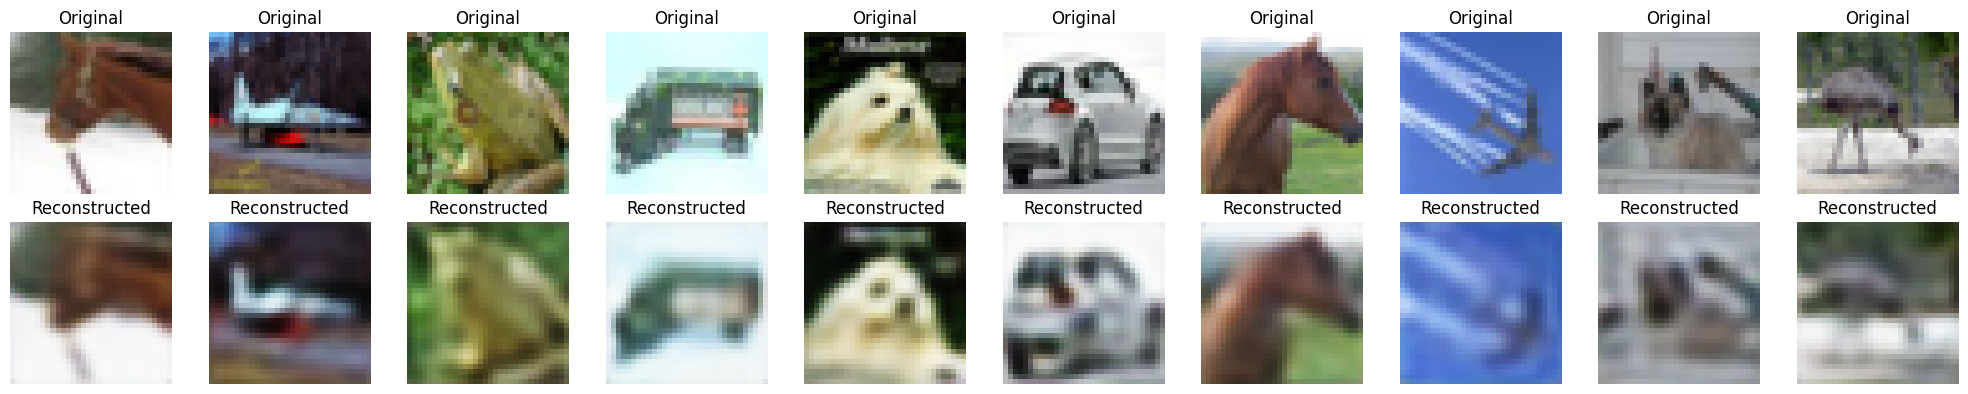

In [29]:
import matplotlib.pyplot as plt
def display_cifar_results(original, reconstructed, n=10):
    """
    Displays two rows of images:
      1) Original images
      2) Reconstructed images
    """
    plt.figure(figsize=(2 * n, 4))  # adjust width for n images

    # Top row: original images
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i])
        plt.title("Original")
        plt.axis("off")

    # Bottom row: reconstructed images
    for i in range(n):
        ax = plt.subplot(2, n, n + i + 1)
        plt.imshow(reconstructed[i])
        plt.title("Reconstructed")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Take one batch from the test dataset
for batch_images, _ in test_dataset.take(1):
    # Convert to numpy (if not already)
    batch_images_np = batch_images.numpy()

    # Run the autoencoder
    reconstructed_np = model.predict(batch_images_np)

    # Display the first 10 images
    display_cifar_results(batch_images_np[:10], reconstructed_np[:10], n=10)
    break  # only take one batch
